In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
df = pd.read_csv('./data/cookies.csv')

## Checking general information

In [3]:
df.shape

(5198, 16)

In [4]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [5]:
df.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
diameter                  int64
mixins                   object
crunch factor           float64
aesthetic appeal          int64
dtype: object

## Checking for missing values

In [6]:
df.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
13,0.48,4.0,1860,64.0,150.0,0.99450,8.06,0.40,NaN,7,melted,12.8,7,"chocolate, oats",1.05,3
16,0.02,NaN,670,9.0,23.0,3.00000,8.47,0.67,9.4,6,cubed,14.0,7,"nuts, oats, chocolate",1.95,3
77,0.14,NaN,360,38.0,155.0,0.99622,8.27,0.50,9.4,7,melted,12.4,7,raisins,1.82,3
173,0.25,9.8,490,59.5,137.0,0.99500,8.16,0.38,NaN,8,melted,13.2,7,"chocolate, oats",1.46,3
448,0.00,1.8,820,3.0,12.0,0.99640,8.54,0.48,10.9,5,cubed,16.2,7,NaN,1.96,3
484,0.33,2.9,440,21.0,73.0,0.98896,8.17,0.32,NaN,10,melted,11.2,7,"chocolate, oats",1.57,3
816,0.49,1.1,480,11.0,138.0,0.99290,8.01,0.42,NaN,7,melted,14.4,7,"nuts, chocolate",1.53,3
1209,0.12,NaN,820,7.0,28.0,0.99700,8.37,0.50,9.4,6,cubed,15.6,7,"nuts,raisins",1.74,3
1562,0.74,1.8,330,33.0,156.0,0.99100,8.29,0.52,NaN,8,melted,15.6,7,raisins,1.54,3
1867,0.24,12.1,560,68.0,210.0,0.99718,8.05,0.50,NaN,7,melted,14.0,7,"nuts, chocolate",1.57,3


#### Given that the number of rows with missing values is very small compared to the size of the dataset we have decided to drop the ones with NaNs in the bake time and sugar index columns. We will instead keep the two rows with NaNs in the mixins column since we will consider those cookies as being plain i.e. without mixins

In [8]:
# Creating a new variable to keep the original df intact

df2 = df

In [9]:
df2.mixins.fillna('plain', inplace=True)

In [10]:
df2.dropna(inplace=True)

In [11]:
df2.shape

(5183, 16)

In [12]:
df2.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.0,5183.00000,5183.000000
mean,0.318092,5.400309,559.594829,30.373336,114.982925,0.995436,8.222012,0.530984,10.495717,7.324715,14.384661,7.0,1.49919,3.000579
std,0.149870,4.668715,353.232673,17.254227,56.494207,0.055712,0.283630,0.150975,1.194754,1.302886,3.026680,0.0,0.28931,0.024054
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.00000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.25000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,7.0,1.50000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996905,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.75000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.00000,4.000000


## Checks to make

- bake temp max is very high
- calories go down to -99
- ph goes up to 25 (max is 14)
- weight goes down to -99
- diameter is always 7
- aesthetic appeal only has [3,4]

### Renaming columns for easier commands

In [13]:
df2.columns = ['sugar_flour_ratio', 'sugar_index', 'bake_temp', 'chill_time',
       'calories', 'density', 'pH', 'gr_baking_soda', 'bake_time',
       'quality', 'butter_type', 'weight', 'diameter', 'mixins',
       'crunch_factor', 'aesthetic_appeal']

### Checking for correlations

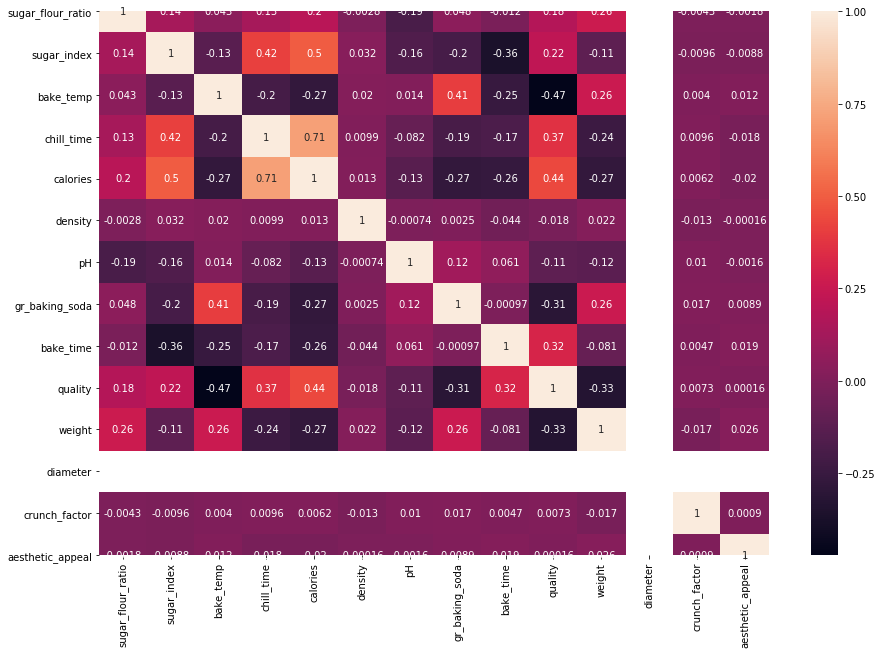

In [14]:
corr_map = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_map, annot=True)

### Calories

In [15]:
df2.query('calories < 0')

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,butter_type,weight,diameter,mixins,crunch_factor,aesthetic_appeal
22,0.28,14.7,510,29.0,-99.0,0.99792,7.96,0.39,9.0,9,melted,14.0,7,"chocolate, oats",1.08,3
200,0.37,1.0,380,6.0,-99.0,0.99020,8.37,0.34,11.4,7,melted,11.2,7,raisins,1.67,3
906,0.26,2.1,830,17.0,-99.0,0.99616,8.29,0.56,9.8,6,cubed,14.8,7,"nuts, oats, chocolate",1.65,3
3099,0.17,12.0,460,65.0,-99.0,0.99760,8.15,0.38,9.0,8,melted,12.0,7,raisins,1.33,3
4428,0.26,9.7,300,39.0,-99.0,0.99080,8.08,0.56,12.9,9,melted,12.4,7,chocolate,1.82,3


#### SInce the values are incorrect and it's only 5 rows (less than 0.001%) we will drop them.

In [16]:
df2 = df2[df2.calories > 0]

### Ph

In [17]:
df2[df2.pH > 14]

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,butter_type,weight,diameter,mixins,crunch_factor,aesthetic_appeal
18,0.26,1.4,410,40.0,141.0,0.9941,25.0,0.72,9.5,8,melted,13.0,7,"chocolate, oats",1.6,3


#### Since pH doesn't go over 14 we will drop the related row

In [18]:
df2.drop(18, inplace=True)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Weight

In [19]:
df2[df2.weight < 0]

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,butter_type,weight,diameter,mixins,crunch_factor,aesthetic_appeal
1783,0.27,9.6,370,19.0,105.0,0.99444,8.04,0.37,10.5,9,melted,-99.0,7,chocolate,1.74,3


#### Same thing as pH

In [20]:
df2.drop(1783, inplace=True)

### Diameter

In [21]:
df2.diameter.unique()

array([7])

#### Since diameter does not have a value that isn't 7 we will be dropping the whole column since it does not give us any meaningful information

In [22]:
df2.drop('diameter', axis=1, inplace=True)

### Aesthetic appeal

In [23]:
df2.aesthetic_appeal.value_counts()

3    5171
4       3
Name: aesthetic_appeal, dtype: int64

#### The information in this column is of no use to use, especially because only 3 rows have a value that is not 3.

In [24]:
df2.drop('aesthetic_appeal', axis=1, inplace=True)

### Bake temp

(array([4.035e+03, 1.016e+03, 7.200e+01, 2.500e+01, 7.000e+00, 7.000e+00,
        9.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  90.,  692., 1294., 1896., 2498., 3100., 3702., 4304., 4906.,
        5508., 6110.]),
 <a list of 10 Patch objects>)

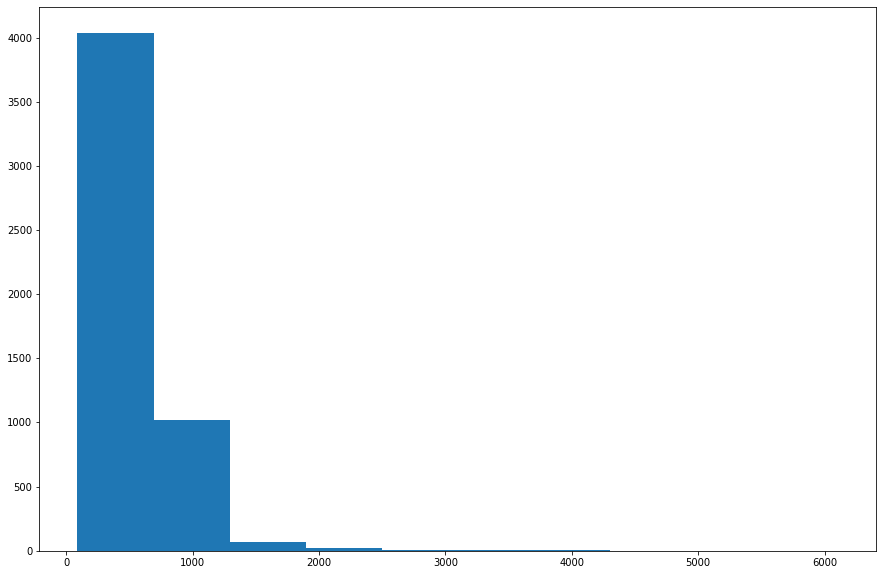

In [25]:
plt.figure(figsize=(15,10))
plt.hist(df2.bake_temp)

#### We decided to remove all bake_temp values that were outside 3 standard deviations from the mean since we are not aware of the actual temperature range of cookie baking in the world of cookie flea.

In [26]:
df2 = df2[(np.abs(zscore(df2.bake_temp)) < 3)]

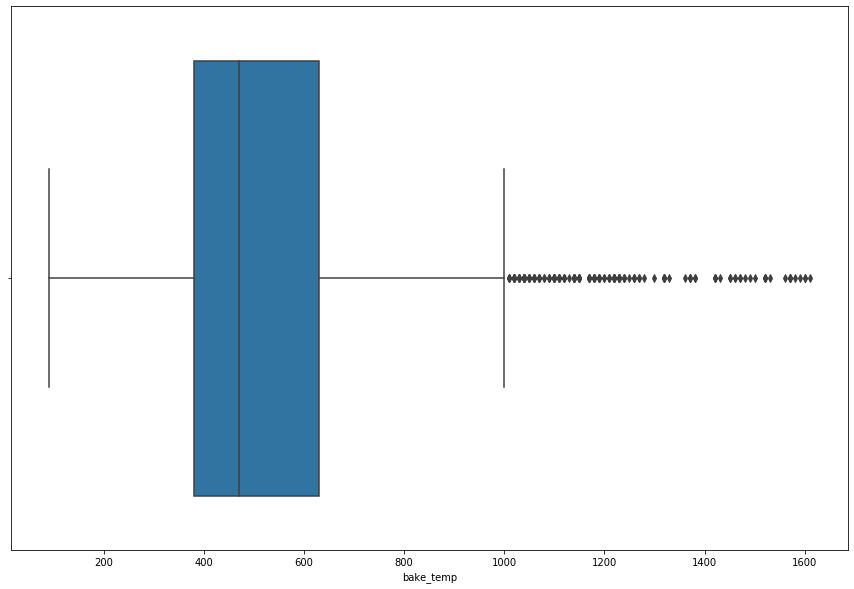

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(df2.bake_temp)

In [28]:
df2.describe()

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,weight,crunch_factor
count,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000,5092.000000
mean,0.316479,5.424293,528.436764,30.417910,115.509230,0.995426,8.220299,0.528075,10.511568,7.340338,14.395463,1.499053
std,0.148323,4.681290,220.721641,17.185912,55.938784,0.056207,0.161440,0.143928,1.195155,1.297535,2.587240,0.289195
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000
25%,0.240000,1.800000,380.000000,17.000000,78.000000,0.992247,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.500000,10.400000,8.000000,14.000000,1.500000
75%,0.390000,8.000000,630.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000
max,3.000000,31.600000,1610.000000,146.500000,366.500000,5.000000,9.010000,1.980000,14.900000,11.000000,31.800000,2.000000


### Density

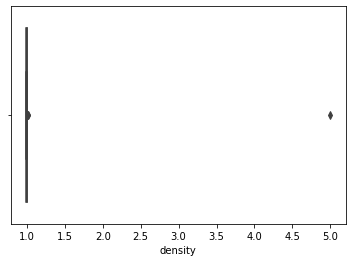

In [29]:
sns.boxplot(df2.density)

In [30]:
df2.query('density > 1.5')

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,butter_type,weight,mixins,crunch_factor
3990,0.24,6.8,570,41.0,163.0,5.0,8.2,0.41,9.9,8,melted,14.6,"nuts, chocolate",1.24


#### We will drop the row since it's the only that doesn't have a value for density close to 1. Also, the fact that it's 5.0 without decimals looks fishy.

In [31]:
df2.drop(3990, inplace=True)

### Pairplot

In [32]:
sns.pairplot(df2)

### Sugar-flour ratio

In [33]:
df2.query('sugar_flour_ratio > 1')

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,butter_type,weight,mixins,crunch_factor
585,3.00,1.2,410,30.0,111.0,0.99254,7.99,0.46,9.4,8,melted,13.0,chocolate,1.04
1936,1.66,2.1,220,34.0,113.0,0.99165,8.26,0.55,12.2,8,melted,14.8,chocolate,1.90
2922,1.23,4.6,350,51.0,294.0,0.99018,8.03,0.43,13.1,8,melted,15.2,chocolate,1.09


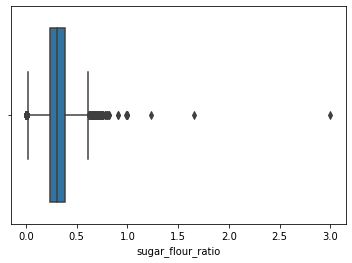

In [34]:
sns.boxplot(df2.sugar_flour_ratio)

In [35]:
df2.query('sugar_flour_ratio > 0.8')

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,butter_type,weight,mixins,crunch_factor
56,1.00,19.95,320,42.0,164.0,0.99742,8.29,0.50,12.0,8,melted,15.4,"nuts, chocolate",1.16
235,0.91,8.20,340,50.0,199.0,0.99394,8.39,0.49,11.7,8,melted,12.6,raisins,1.73
585,3.00,1.20,410,30.0,111.0,0.99254,7.99,0.46,9.4,8,melted,13.0,chocolate,1.04
1381,0.99,1.20,1220,45.0,129.0,0.99360,8.09,0.31,8.7,8,melted,13.2,"chocolate, oats",1.24
1605,0.81,1.10,1370,52.0,123.0,0.99320,8.03,0.39,9.2,8,melted,13.8,chocolate,1.56
1936,1.66,2.10,220,34.0,113.0,0.99165,8.26,0.55,12.2,8,melted,14.8,chocolate,1.90
2334,1.00,19.50,410,33.0,148.0,0.99770,8.24,0.38,12.0,8,melted,15.0,"nuts, chocolate",2.00
2685,0.82,1.30,1490,70.0,109.0,0.99304,7.93,0.42,9.2,8,melted,14.4,chocolate,1.30
2789,1.00,18.20,470,55.0,205.0,0.99965,7.96,0.43,9.6,7,melted,16.4,raisins,1.94
2922,1.23,4.60,350,51.0,294.0,0.99018,8.03,0.43,13.1,8,melted,15.2,chocolate,1.09


#### We decided to drop row 585 because of the incredibly high sugar to flour ratio.

In [36]:
df2.drop(585, inplace=True)

### Sugar index

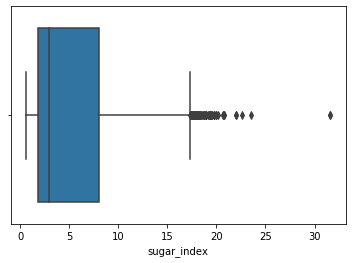

In [37]:
sns.boxplot(df2.sugar_index)

In [38]:
len(df2.sugar_index[(np.abs(zscore(df2.sugar_index)) > 3)])

21

#### We decided to remove the outliers for the sugar index using the same logic as before

In [39]:
df2 = df2[(np.abs(zscore(df2.sugar_index)) < 3)]

In [40]:
df2.describe()

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,weight,crunch_factor
count,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000
mean,0.315463,5.357733,528.455317,30.371079,115.297692,0.994616,8.220854,0.528481,10.514579,7.338726,14.397021,1.498966
std,0.142729,4.568348,220.809126,17.186357,55.903272,0.002913,0.161436,0.144076,1.193835,1.299885,2.591624,0.289015
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000
25%,0.240000,1.800000,380.000000,17.000000,77.500000,0.992230,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.400000,8.000000,14.000000,1.500000
75%,0.390000,8.000000,630.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000
max,1.660000,19.450000,1610.000000,146.500000,366.500000,1.003200,9.010000,1.980000,14.900000,11.000000,31.800000,2.000000


### Dealing with categorical variables

In [41]:
df2.mixins.value_counts()

chocolate                         1853
raisins                           1175
chocolate, oats                    743
nuts, chocolate                    499
nuts,raisins                       323
nuts, oats, chocolate              280
nuts, oats                         100
chocolate, peanut butter            49
raisins, oats                       24
peanut butter                       14
oats                                 4
chocolate, oats, peanut butter       2
plain                                2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [42]:
df2.butter_type.value_counts()

melted    3839
cubed     1230
Name: butter_type, dtype: int64

### We will create a dummy column for the butter_type categorical variable and we will be dropping one of them since there are only two options, therefore if we have a 0 we will know that the related row refers to the other butter_type

In [43]:
df2 = pd.get_dummies(df2, columns = ['butter_type'], drop_first=True)

### We have created 6 different dummy columns for all the possible mixins. We will delete the plain one since when all the other columns are 0 we will know that the related row refers to plain.

In [44]:
mixins_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter', 'plain']

# Your code here
for mixin in mixins_list:
    df2[mixin] = np.where(df2.mixins.str.contains(mixin), 1, 0)


In [45]:
df2.drop('plain', axis=1, inplace=True)

### Last check after cleaning

In [46]:
df2.describe()

,sugar_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,gr_baking_soda,bake_time,quality,weight,crunch_factor,butter_type_melted,chocolate,raisins,oats,nuts,peanut butter
count,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000
mean,0.315463,5.357733,528.455317,30.371079,115.297692,0.994616,8.220854,0.528481,10.514579,7.338726,14.397021,1.498966,0.757349,0.675873,0.300454,0.227461,0.237128,0.013020
std,0.142729,4.568348,220.809126,17.186357,55.903272,0.002913,0.161436,0.144076,1.193835,1.299885,2.591624,0.289015,0.428728,0.468094,0.458501,0.419234,0.425363,0.113373
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,1.800000,380.000000,17.000000,77.500000,0.992230,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.400000,8.000000,14.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.390000,8.000000,630.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.660000,19.450000,1610.000000,146.500000,366.500000,1.003200,9.010000,1.980000,14.900000,11.000000,31.800000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df2.isna().sum()

sugar_flour_ratio     0
sugar_index           0
bake_temp             0
chill_time            0
calories              0
density               0
pH                    0
gr_baking_soda        0
bake_time             0
quality               0
weight                0
mixins                0
crunch_factor         0
butter_type_melted    0
chocolate             0
raisins               0
oats                  0
nuts                  0
peanut butter         0
dtype: int64

### Saving clean df to .csv

In [49]:
df2.to_csv('./data/clean_data.csv')